In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [11]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [12]:
from visual_behavior.data_access import loading as loading

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

In [13]:
import visual_behavior.data_access.utilities as utilities

import visual_behavior.visualization.ophys.platform_paper_figures as ppf

In [16]:
df = pd.read_hdf(r"\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_cache\cell_metrics\795953296_traces_full_session_full_session_filtered_events.h5", key='df')

### load experiments_table from cache

In [5]:
cache_dir = loading.get_platform_analysis_cache_dir()
# cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
# print(cache_dir)

In [6]:
experiments_table = loading.get_platform_paper_experiment_table()
print(len(experiments_table))

1249


### get useful info

In [7]:
experience_level = np.sort(experiments_table.experience_level.unique())
print(experience_level)

cell_types = np.sort(experiments_table.cell_type.unique())[::-1]
print(cell_types)

['Familiar' 'Novel 1' 'Novel >1']
['Vip Inhibitory' 'Sst Inhibitory' 'Excitatory']


### load cells table

In [8]:
cells_table = loading.get_cell_table()
print(len(cells_table.ophys_experiment_id.unique()))

1249


### limit to cells matched in last familiar and second novel active

In [9]:
# load cells table
cells_table = loading.get_cell_table()
print(len(cells_table))

# limit to last familiar active and second novel active
cells_table = utilities.limit_to_last_familiar_second_novel_active(cells_table)
print(len(cells_table))

# limit to containers with all 3 experience levels
cells_table = utilities.limit_to_containers_with_all_experience_levels(cells_table)
print(len(cells_table))

# limit to cells matched across experience levels
cells_table = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(cells_table)
len(cells_table)

utilities.count_mice_expts_containers_cells(cells_table)

77922
28442
25935


n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  34                     62   
               Novel 1                   34                     62   
               Novel >1                  34                     62   
Sst Inhibitory Familiar                  14                     28   
               Novel 1                   14                     28   
               Novel >1                  14                     28   
Vip Inhibitory Familiar                  17                     41   
               Novel 1                   17                     41   
               Novel >1                  17                     41   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            62                3306  
               Novel 1                             62                3306  
               Novel >1                            62                3306  
Sst Inhibitory Familiar                            28                 200  
               Novel 1                             28                 200  
               Novel >1                            28                 200  
Vip Inhibitory Familiar                            41                 415  
               Novel 1                             41                 415  
               Novel >1                            41                 415

### get cell metrics 

In [6]:
import visual_behavior.ophys.response_analysis.cell_metrics as cell_metrics

In [11]:
%%time

condition = 'omissions' # can be 'changes', 'omissions', 'images', or 'traces'
session_subset = 'full_session' # can be 'engaged', 'disengaged', or 'full_session'
stimulus = 'all_images' # can be 'all_images', 'pref_image'
use_events = True # True for events, False for dF/F
filter_events = True

ophys_experiment_ids = experiments_table.index.values

metrics_df = cell_metrics.load_cell_metrics_table_for_experiments(ophys_experiment_ids, condition, stimulus, 
                                                                  session_subset, use_events, filter_events)

metrics_df = metrics_df.merge(experiments_table, on=['ophys_experiment_id', 'ophys_session_id'])

original_metrics_df = metrics_df.copy()


//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/platform_paper_cache


100%|██████████████████████████████████████████████████████████████████████████████| 1249/1249 [01:46<00:00, 11.69it/s]


Wall time: 1min 48s


In [12]:
metrics_df

,cell_specimen_id,pref_image,non_pref_image,mean_response,image_selectivity_index,image_selectivity_index_one_vs_all,lifetime_sparseness,fraction_significant_p_value_gray_screen,fano_factor,reliability,...,area_depth,area_binned_depth,date,first_novel,n_relative_to_first_novel,last_familiar,last_familiar_active,second_novel,second_novel_active,experience_exposure
0,1086489529,im063,im061,1.609333e-04,1.0,0.992211,0.988621,0.037975,17.143498,0.363692,...,VISp_375,VISp_375,20181108,False,NaN,False,False,False,False,Familiar > 3
1,1086489533,im085,im061,2.305708e-24,1.0,1.000000,1.000000,0.012658,17.663522,-0.071429,...,VISp_375,VISp_375,20181108,False,NaN,False,False,False,False,Familiar > 3
2,1086489541,im063,im061,4.767803e-06,1.0,1.000000,1.000000,0.025316,17.663522,0.971225,...,VISp_375,VISp_375,20181108,False,NaN,False,False,False,False,Familiar > 3
3,1086489548,im065,im061,1.891708e-05,1.0,1.000000,1.000000,0.012658,17.663522,-0.206055,...,VISp_375,VISp_375,20181108,False,NaN,False,False,False,False,Familiar > 3
4,1086489555,im061,im061,0.000000e+00,NaN,NaN,NaN,0.000000,NaN,NaN,...,VISp_375,VISp_375,20181108,False,NaN,False,False,False,False,Familiar > 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77917,1120126493,im106,im031,1.292843e-03,1.0,0.949181,0.959048,0.045685,17.741333,0.356882,...,VISl_274,VISl_275,20210308,False,4.0,False,False,False,False,Novel > 3
77918,1120126570,im106,im031,1.088405e-05,1.0,0.982388,0.978204,0.025381,26.283623,0.994446,...,VISl_274,VISl_275,20210308,False,4.0,False,False,False,False,Novel > 3
77919,1120131852,im045,im031,2.820972e-04,1.0,0.903168,0.904208,0.025381,20.915163,0.519211,...,VISl_274,VISl_275,20210308,False,4.0,False,False,False,False,Novel > 3
77920,1120131889,im075,im035,1.000502e-03,1.0,0.733535,0.835005,0.040609,19.373582,0.513283,...,VISl_274,VISl_275,20210308,False,4.0,False,False,False,False,Novel > 3


In [5]:
metrics_df.keys()

NameError: name 'metrics_df' is not defined

In [14]:
metrics = metrics_df.keys()[3:12]

### index sorting

In [15]:
areas_depths = ['VISp_75', 'VISp_175', 'VISp_275', 'VISp_375', 
                'VISl_75', 'VISl_175', 'VISl_275', 'VISl_375']
areas_depths = areas_depths[::-1]

### cell counts - full dataset

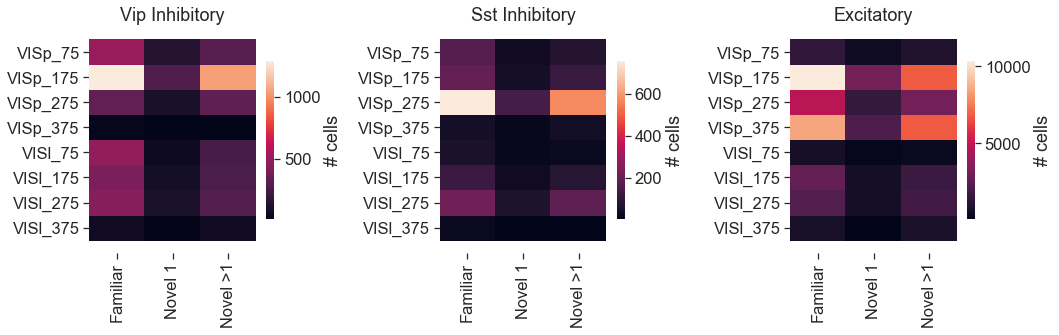

In [16]:
metric = 'lifetime_sparseness'
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, cell_type in enumerate(cell_types):
    tmp = original_metrics_df[original_metrics_df.cell_type==cell_type].groupby(['area_binned_depth', 'experience_level']).count()[[metric]].unstack(level=-1)
    tmp.columns = tmp.columns.droplevel()
    tmp = tmp.reindex(areas_depths)
    ax[i] = sns.heatmap(data=tmp, ax=ax[i], cbar_kws={'label':'# cells', 'shrink':0.7})
    ax[i].set_ylim(-0.5, tmp.shape[0]+0.5)
    ax[i].set_yticklabels(tmp.index, rotation=0);
    ax[i].set_xticklabels(tmp.columns, rotation=90);
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
fig.tight_layout()

### limit to closest familiar and active sessions

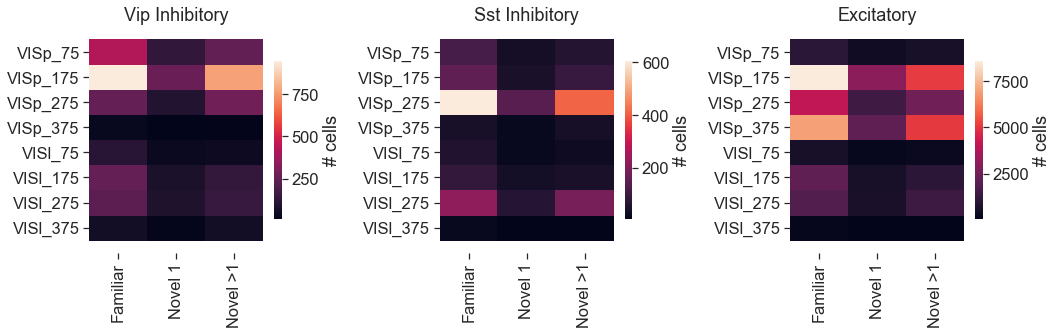

In [17]:
df = original_metrics_df.copy()
df = utilities.limit_to_containers_with_all_experience_levels(df)
# df = utilities.limit_to_last_familiar_second_novel_active(df)
# df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(df)

metric = 'lifetime_sparseness'
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, cell_type in enumerate(cell_types):
    tmp = df[df.cell_type==cell_type].groupby(['area_binned_depth', 'experience_level']).count()[[metric]].unstack(level=-1)
    tmp.columns = tmp.columns.droplevel()
    tmp = tmp.reindex(areas_depths)
    ax[i] = sns.heatmap(data=tmp, ax=ax[i], cbar_kws={'label':'# cells', 'shrink':0.7})
    ax[i].set_ylim(-0.5, tmp.shape[0]+0.5)
    ax[i].set_yticklabels(tmp.index, rotation=0);
    ax[i].set_xticklabels(tmp.columns, rotation=90);
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
fig.tight_layout()

### split by areas

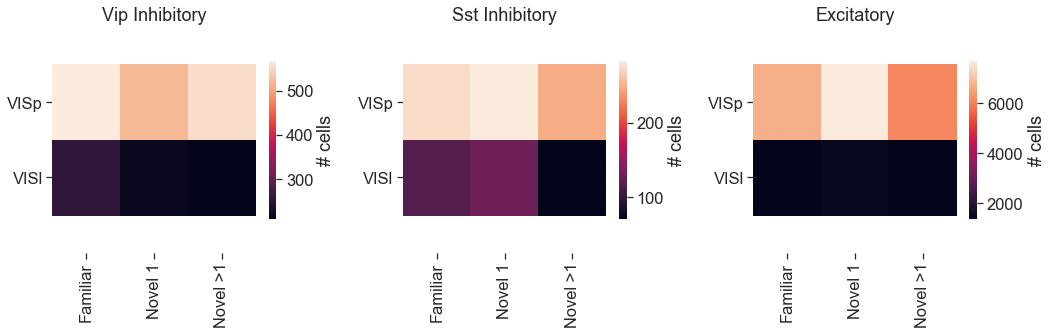

In [18]:
df = original_metrics_df.copy()
df = utilities.limit_to_containers_with_all_experience_levels(df)
df = utilities.limit_to_last_familiar_second_novel_active(df)
# df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(df)

metric = 'cell_specimen_id'
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, cell_type in enumerate(cell_types):
    tmp = df[df.cell_type==cell_type].groupby(['targeted_structure', 'experience_level']).count()[[metric]].unstack(level=-1)
    tmp.columns = tmp.columns.droplevel()
#     tmp = tmp.reindex(areas_depths)
    ax[i] = sns.heatmap(data=tmp, ax=ax[i], cbar_kws={'label':'# cells', 'shrink':0.7})
    ax[i].set_ylim(-0.5, tmp.shape[0]+0.5)
    ax[i].set_yticklabels(tmp.index, rotation=0);
    ax[i].set_xticklabels(tmp.columns, rotation=90);
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
fig.tight_layout()

### split by depths

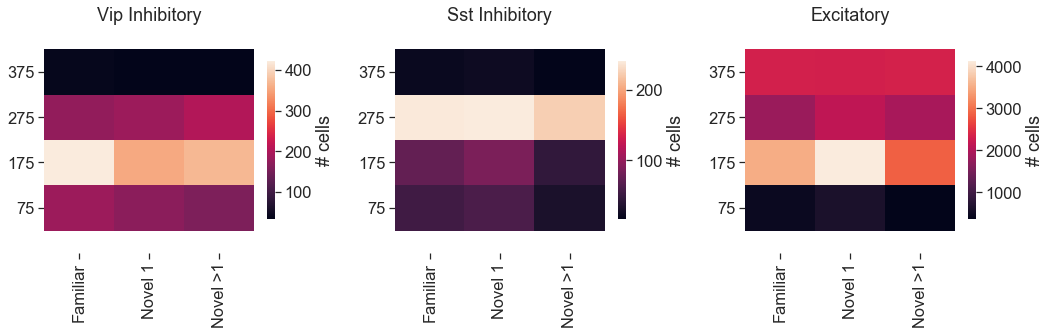

In [19]:
df = original_metrics_df.copy()
df = utilities.limit_to_containers_with_all_experience_levels(df)
df = utilities.limit_to_last_familiar_second_novel_active(df)
# df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(df)

metric = 'cell_specimen_id'
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, cell_type in enumerate(cell_types):
    tmp = df[df.cell_type==cell_type].groupby(['binned_depth', 'experience_level']).count()[[metric]].unstack(level=-1)
    tmp.columns = tmp.columns.droplevel()
#     tmp = tmp.reindex(areas_depths)
    ax[i] = sns.heatmap(data=tmp, ax=ax[i], cbar_kws={'label':'# cells', 'shrink':0.7})
    ax[i].set_ylim(-0.5, tmp.shape[0]+0.5)
    ax[i].set_yticklabels(tmp.index, rotation=0);
    ax[i].set_xticklabels(tmp.columns, rotation=90);
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
fig.tight_layout()

### limit to cells matched in most recent familiar and novel sessions

In [20]:
metrics_df = original_metrics_df.copy()
metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
metrics_df = utilities.limit_to_last_familiar_second_novel_active(metrics_df)
# metrics_df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(metrics_df)

### limit to multiscope

In [21]:
metrics_df = metrics_df[metrics_df.project_code=='VisualBehaviorMultiscope']

### metrics split by area

In [22]:
import visual_behavior.visualization.utils as utils

In [23]:
def plot_metric_pointplot_areas(metrics_df, metric):
    palette = utils.get_experience_level_colors()
    experience_levels = np.sort(metrics_df.experience_level.unique())
    cell_types = np.sort(metrics_df.cell_type.unique())[::-1]

    fig, ax = plt.subplots(1,3, figsize=(15,5))

    for i, cell_type in enumerate(cell_types):
        ax[i] = sns.pointplot(data=metrics_df[metrics_df.cell_type==cell_type], x='targeted_structure', 
                              y=metric, hue='experience_level', hue_order=experience_levels, 
                              palette=palette, ax=ax[i], join=False, dodge=0.4)
        ax[i].legend(fontsize='x-small', title='')
        
#         ax[i].set_ylim(-0.5, tmp.shape[0]+0.5)
#         ax[i].set_yticklabels(tmp.index, rotation=0);
#         ax[i].set_xticklabels(tmp.columns, rotation=90);
        ax[i].set_title(cell_type)
#         ax[i].set_xlabel('')
#         ax[i].set_ylabel('')
    fig.tight_layout()
    


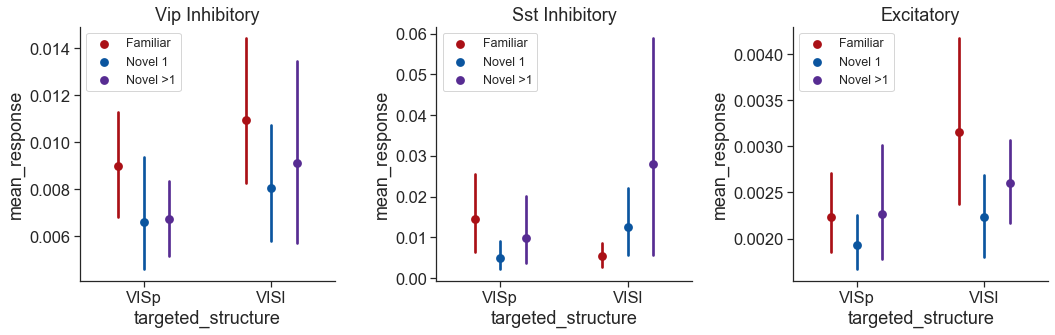

In [24]:
plot_metric_pointplot_areas(metrics_df, metrics[0])

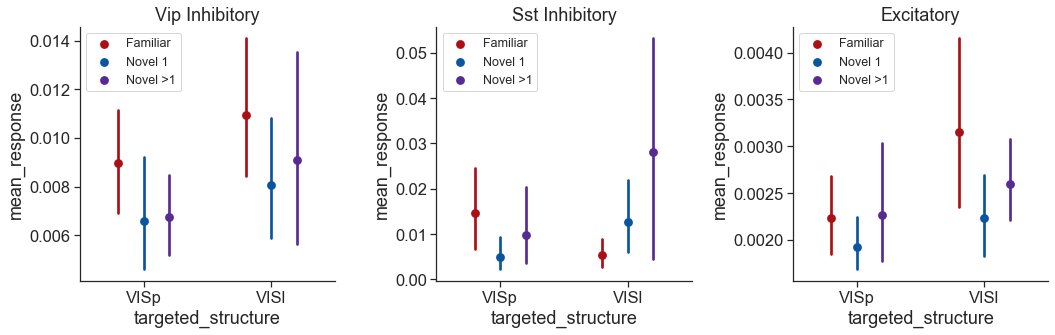

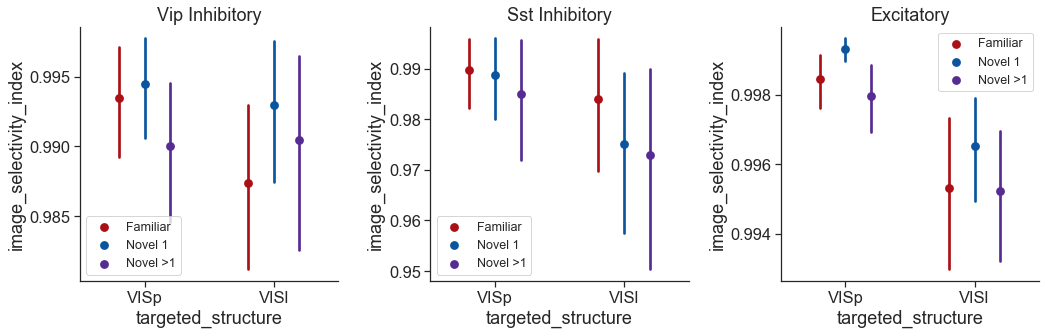

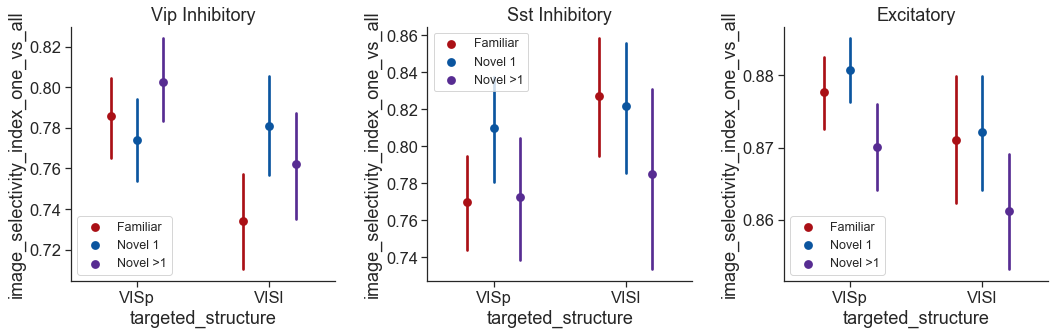

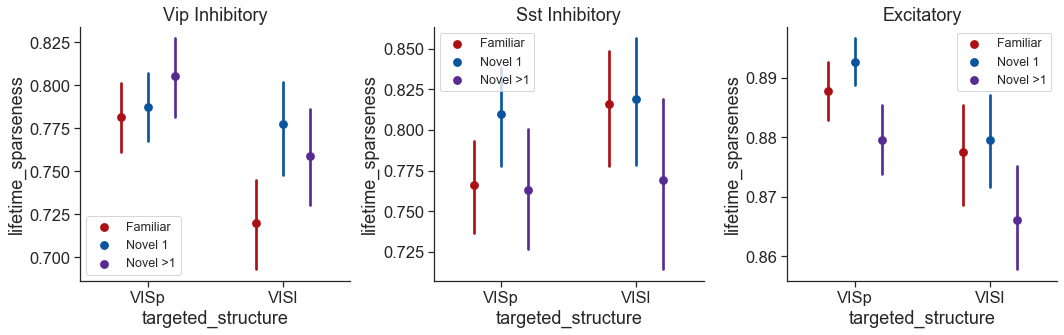

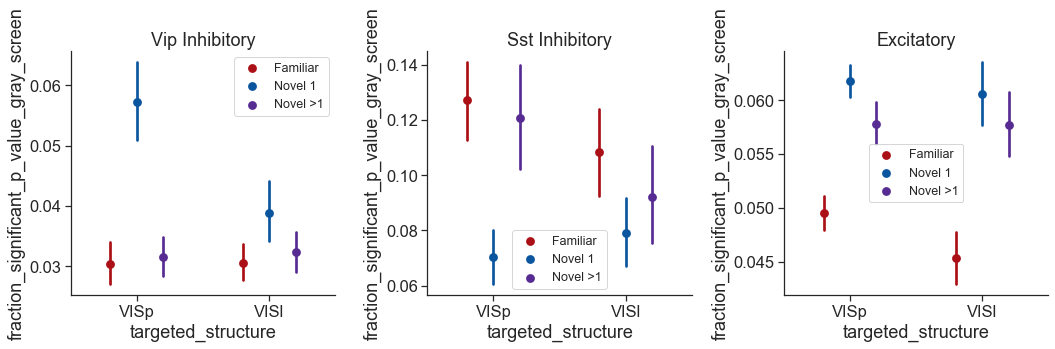

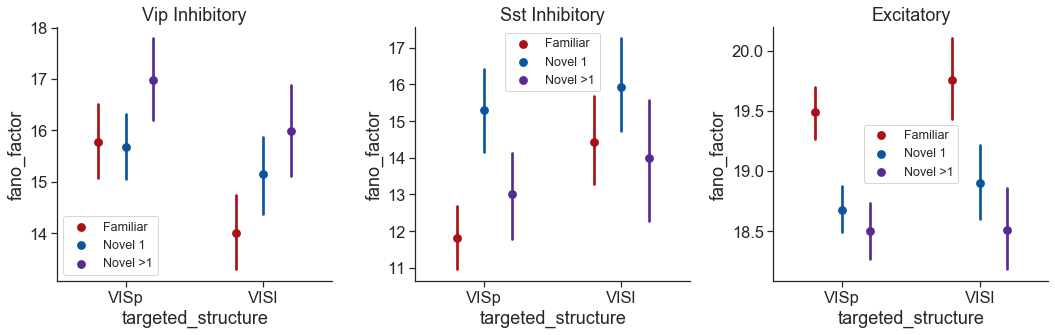

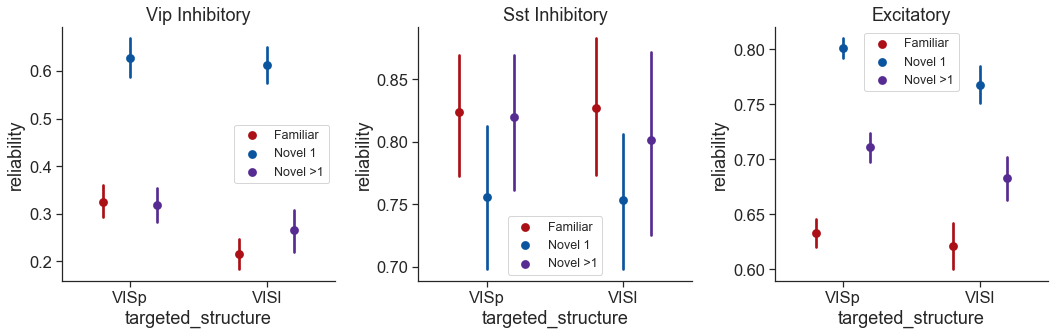

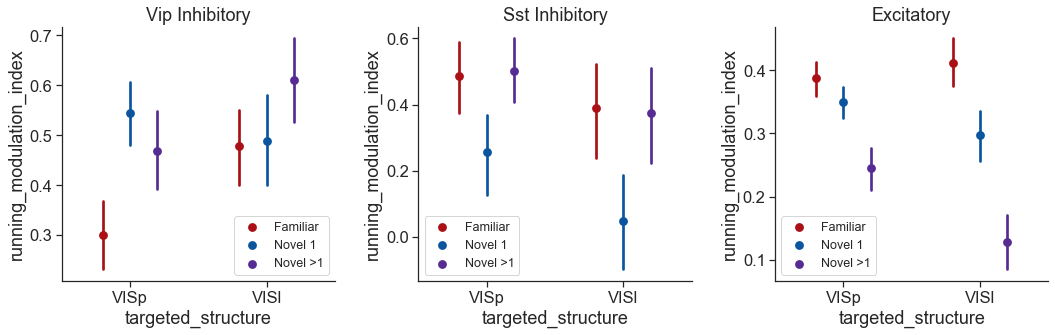

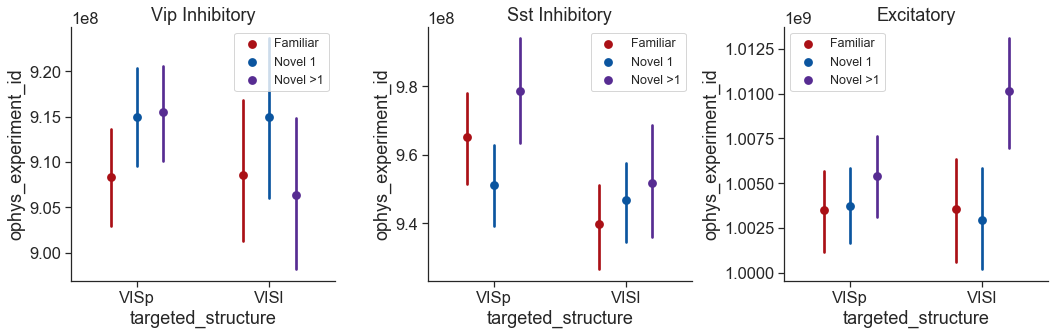

In [25]:
for metric in metrics:
    plot_metric_pointplot_areas(metrics_df, metric)

In [26]:
def plot_metric_heatmap_areas(metrics_df, metric):
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))

    for i, cell_type in enumerate(cell_types):
        tmp = metrics_df[metrics_df.cell_type==cell_type].groupby(['targeted_structure', 'experience_level']).mean()[[metric]].unstack(level=-1)
        tmp.columns = tmp.columns.droplevel()
        ax[i] = sns.heatmap(data=tmp, ax=ax[i], cbar_kws={'label':metric, 'shrink':0.7})
        ax[i].set_ylim(-0.5, tmp.shape[0]+0.5)
        ax[i].set_yticklabels(tmp.index, rotation=0);
        ax[i].set_xticklabels(tmp.columns, rotation=90);
        ax[i].set_title(cell_type)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
    fig.tight_layout()

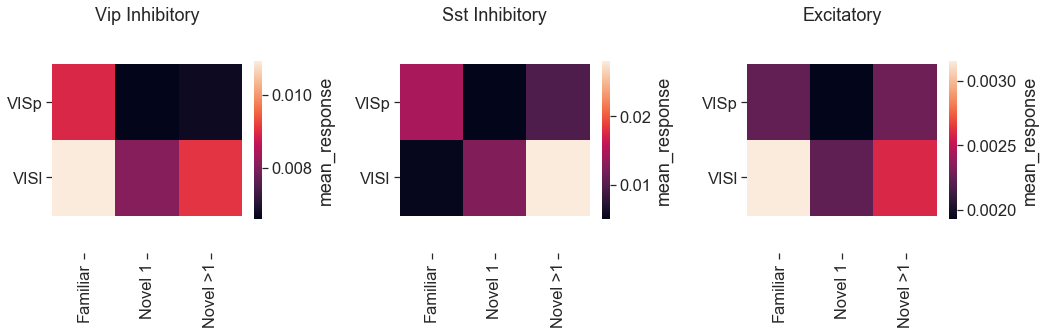

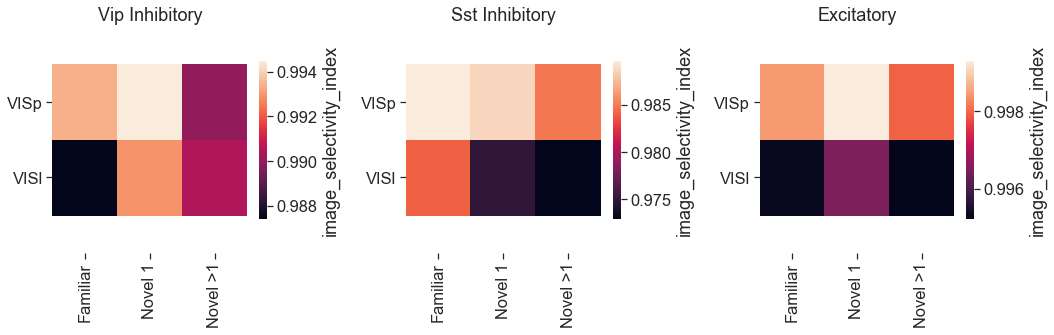

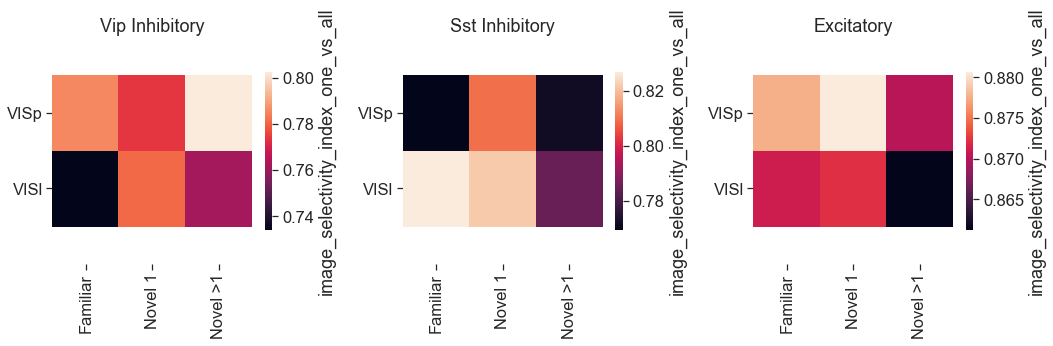

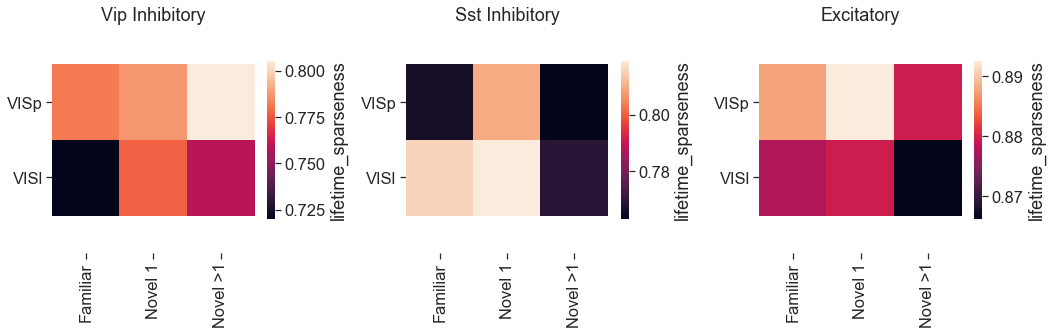

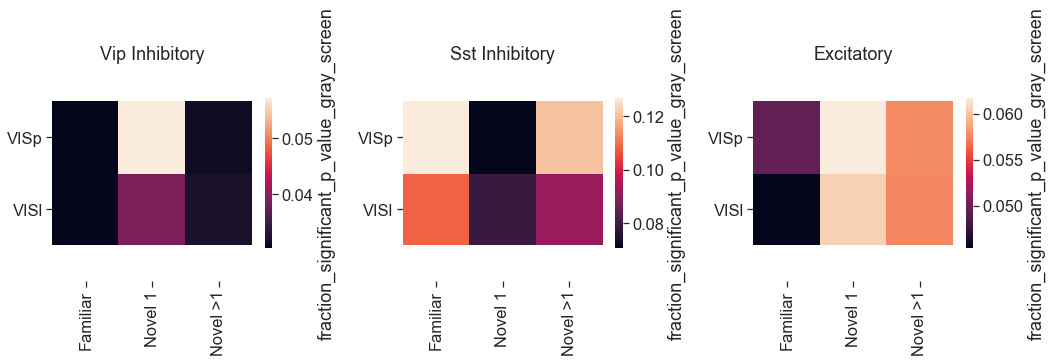

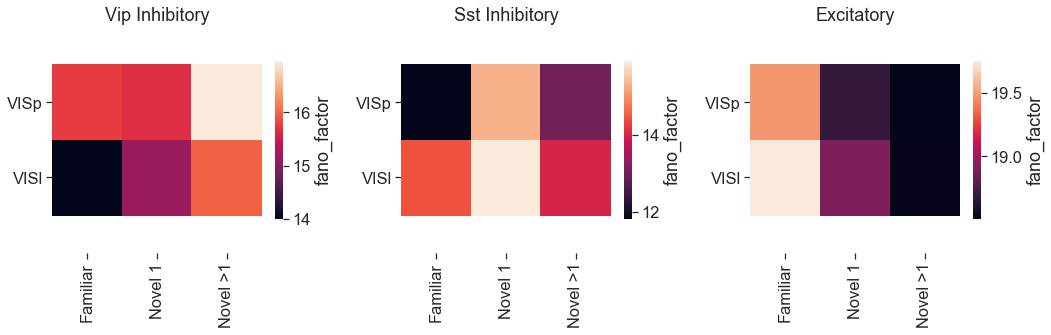

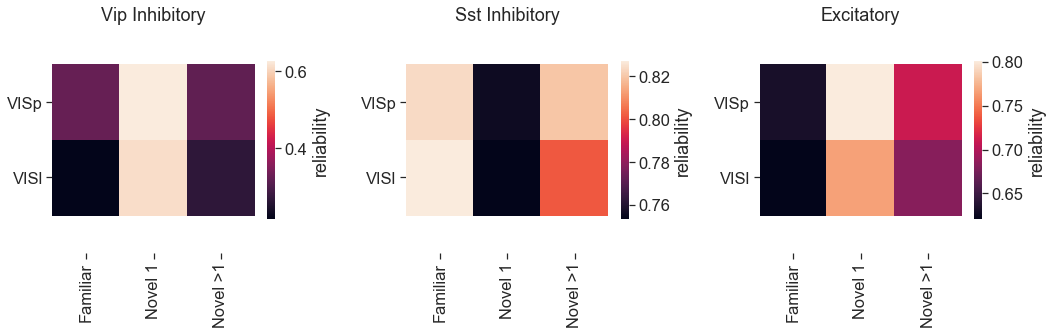

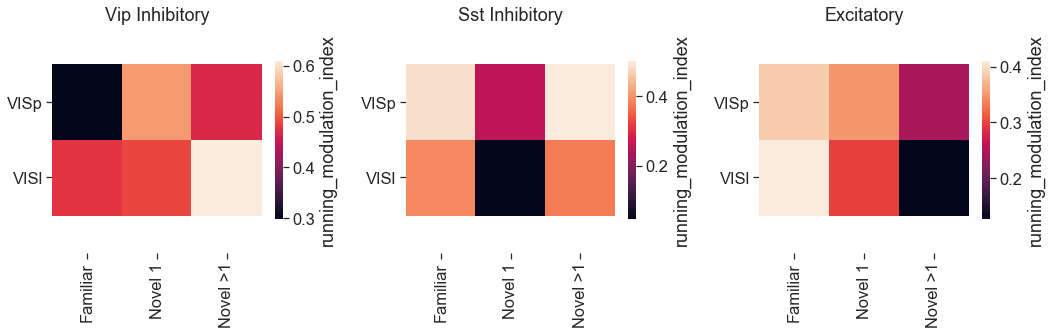

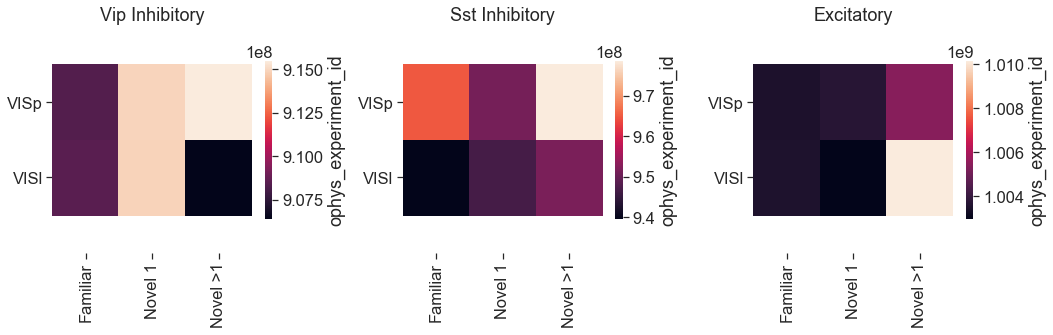

In [27]:
for metric in metrics:
    plot_metric_heatmap_areas(metrics_df, metric)

### metrics split by depths

In [28]:
def plot_metric_heatmap_depths(metrics_df, metric):
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))

    for i, cell_type in enumerate(cell_types):
        tmp = metrics_df[metrics_df.cell_type==cell_type].groupby(['binned_depth', 'experience_level']).mean()[[metric]].unstack(level=-1)
        tmp.columns = tmp.columns.droplevel()
        ax[i] = sns.heatmap(data=tmp, ax=ax[i], cbar_kws={'label':metric, 'shrink':0.7})
        ax[i].set_ylim(-0.5, tmp.shape[0]+0.5)
        ax[i].set_yticklabels(tmp.index, rotation=0);
        ax[i].set_xticklabels(tmp.columns, rotation=90);
        ax[i].set_title(cell_type)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
    fig.tight_layout()

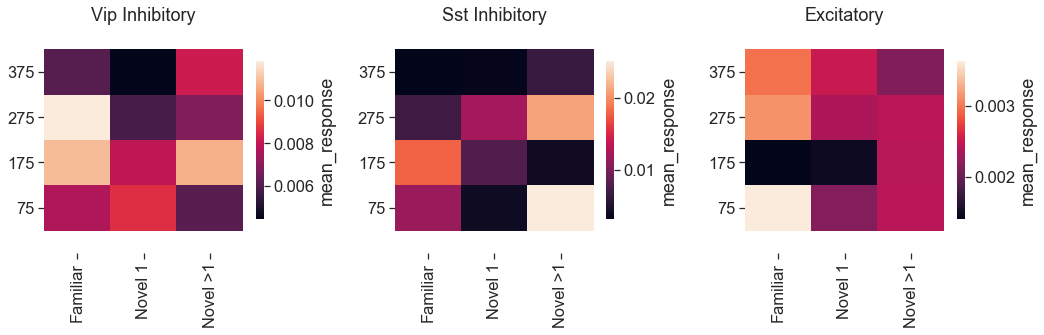

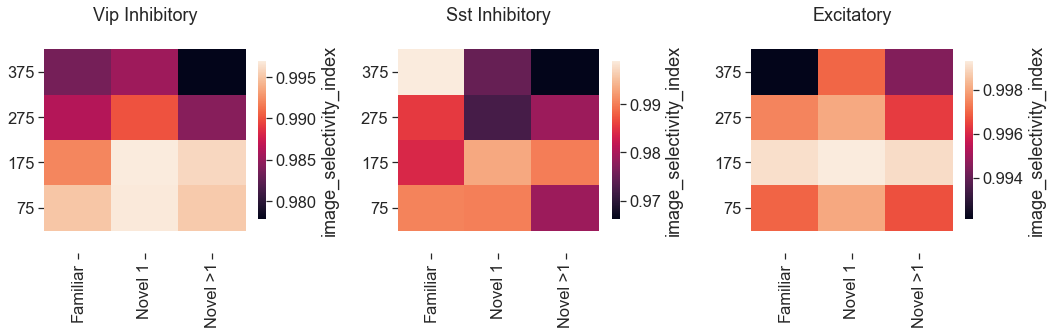

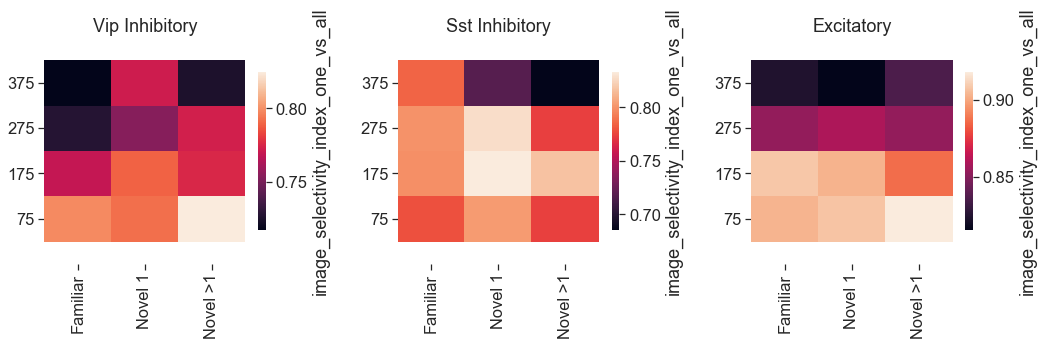

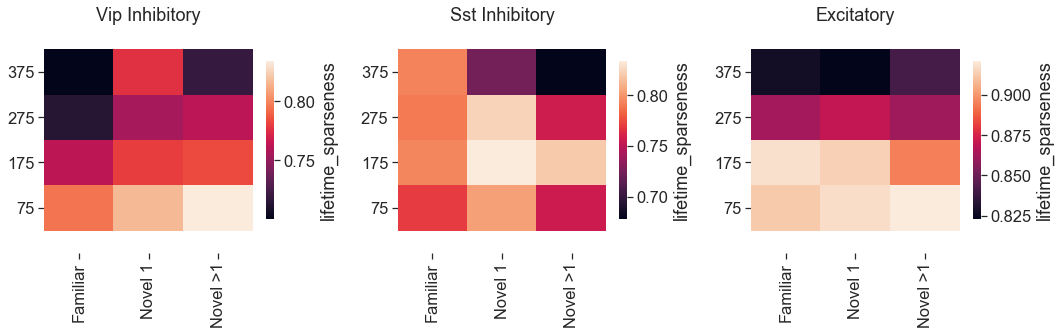

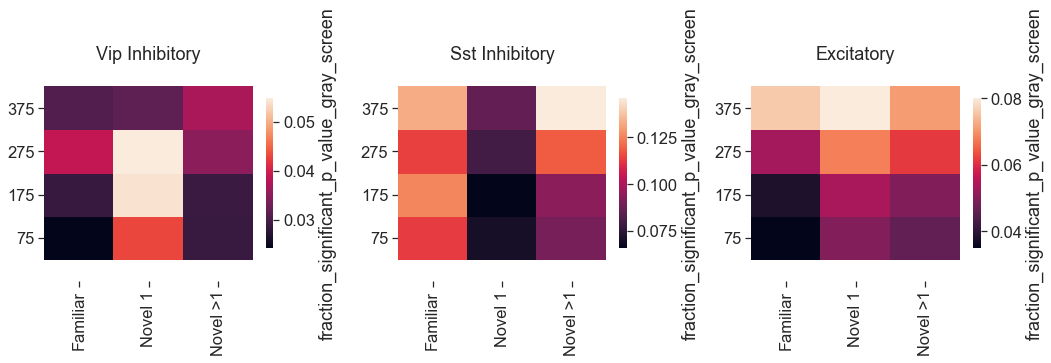

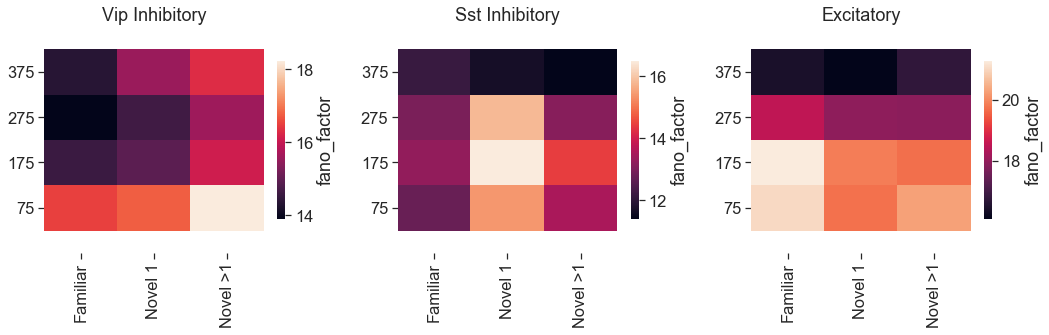

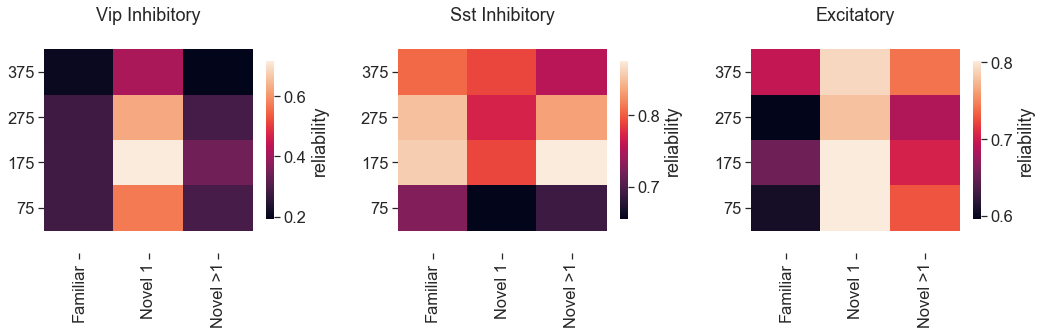

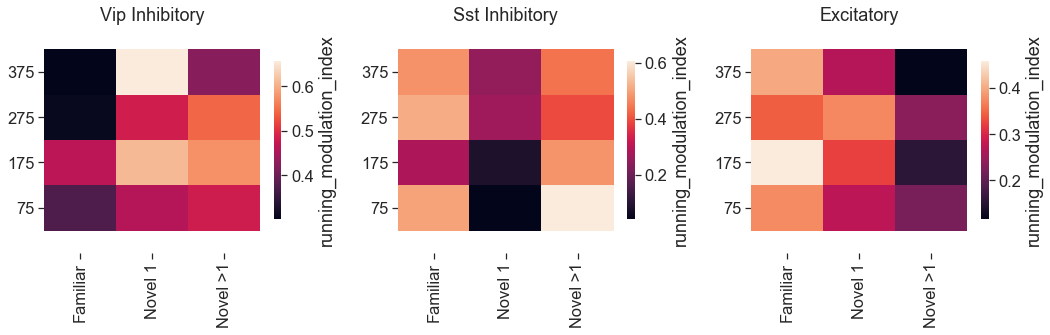

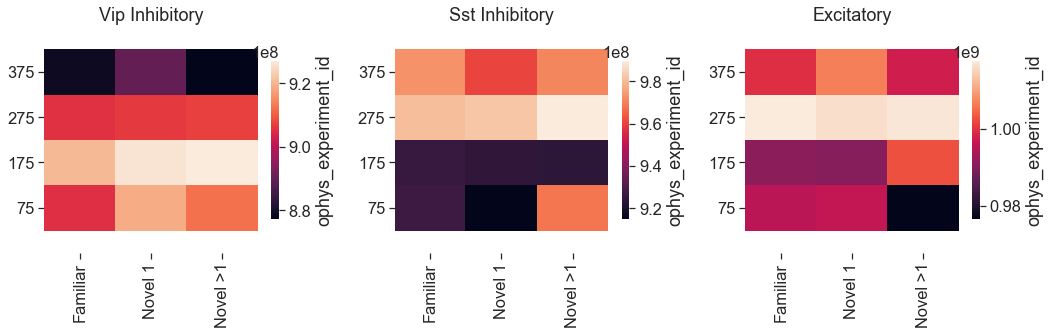

In [29]:
for metric in metrics:
    plot_metric_heatmap_depths(metrics_df, metric)

### cell counts matched dataset split by areas and depths

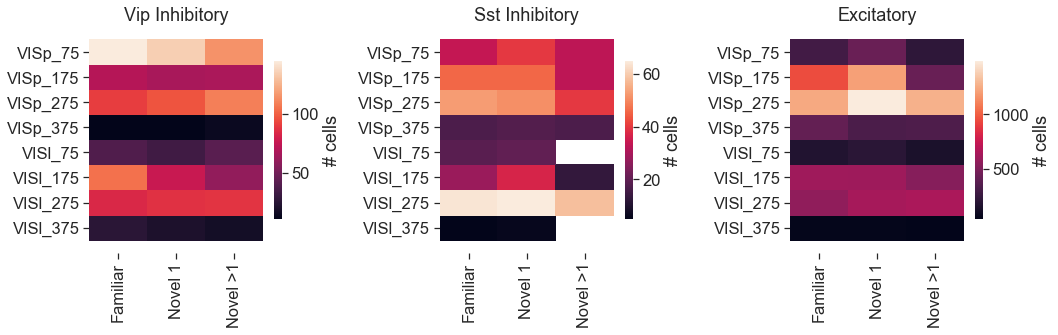

In [30]:
metric = 'lifetime_sparseness'
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, cell_type in enumerate(cell_types):
    tmp = metrics_df[metrics_df.cell_type==cell_type].groupby(['area_binned_depth', 'experience_level']).count()[[metric]].unstack(level=-1)
    tmp.columns = tmp.columns.droplevel()
    tmp = tmp.reindex(areas_depths)
    ax[i] = sns.heatmap(data=tmp, ax=ax[i], cbar_kws={'label':'# cells', 'shrink':0.7})
    ax[i].set_ylim(-0.5, tmp.shape[0]+0.5)
    ax[i].set_yticklabels(tmp.index, rotation=0);
    ax[i].set_xticklabels(tmp.columns, rotation=90);
    ax[i].set_title(cell_type)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
fig.tight_layout()

### metric values split by area and depth

In [31]:
def plot_metric_heatmap_areas_depths(metrics_df, metric):
    
    areas_depths = ['VISp_75', 'VISp_175', 'VISp_275', 'VISp_375', 
                'VISl_75', 'VISl_175', 'VISl_275', 'VISl_375']
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))

    for i, cell_type in enumerate(cell_types):
        tmp = metrics_df[metrics_df.cell_type==cell_type].groupby(['area_binned_depth', 'experience_level']).mean()[[metric]].unstack(level=-1)
        tmp.columns = tmp.columns.droplevel()
        tmp = tmp.reindex(areas_depths[::-1])
        ax[i] = sns.heatmap(data=tmp, ax=ax[i], cbar_kws={'label':metric, 'shrink':0.7})
        ax[i].set_ylim(-0.5, tmp.shape[0]+0.5)
        ax[i].set_yticklabels(tmp.index, rotation=0);
        ax[i].set_xticklabels(tmp.columns, rotation=90);
        ax[i].set_title(cell_type)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
    fig.tight_layout()

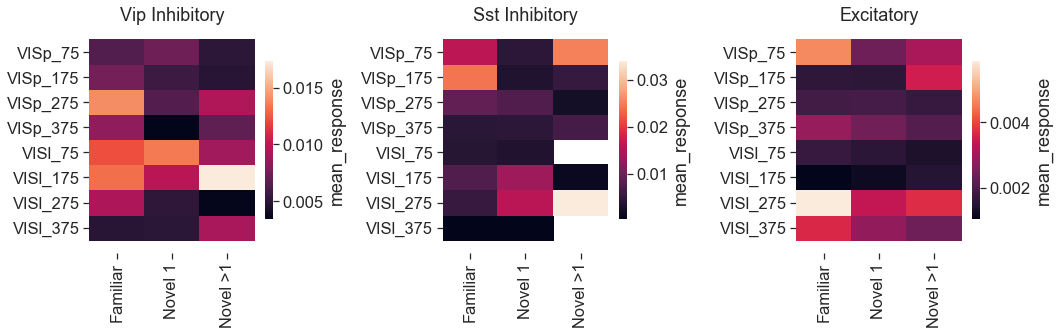

In [32]:
metric = metrics[0]
plot_metric_heatmap_areas_depths(metrics_df, metric)

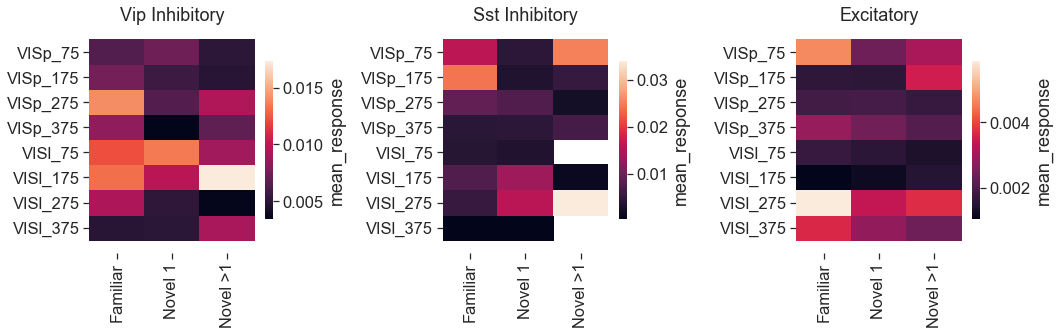

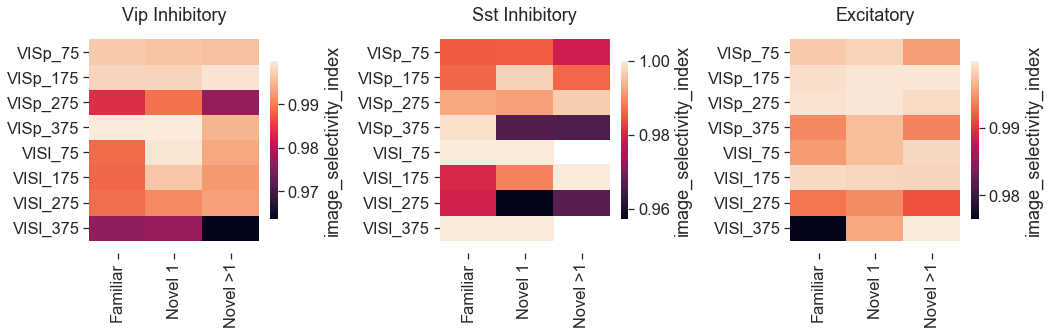

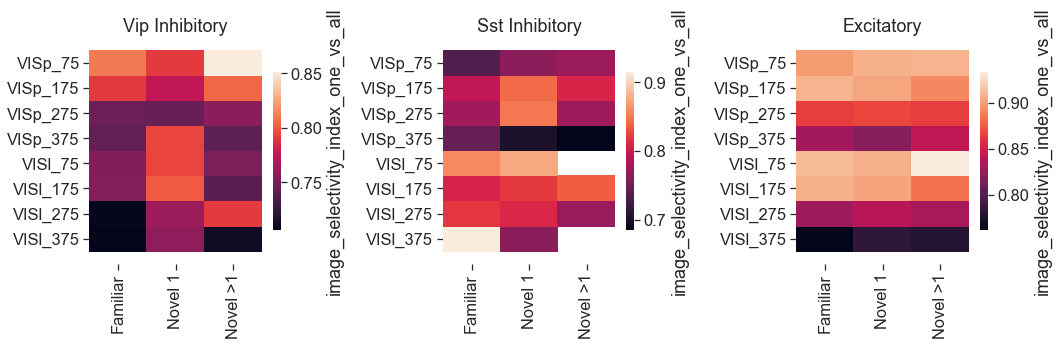

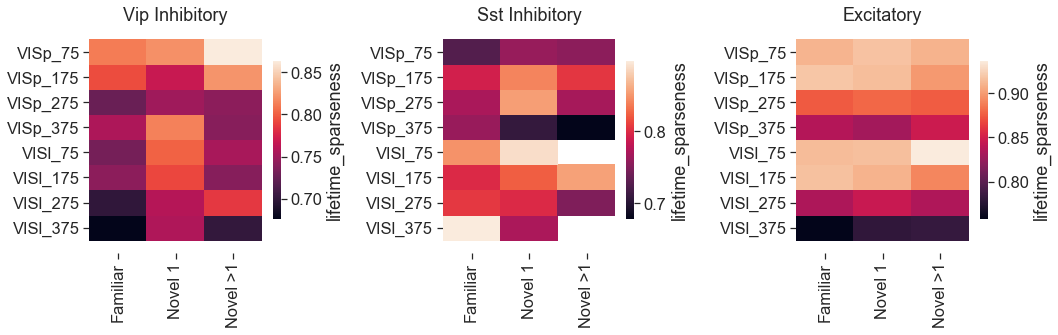

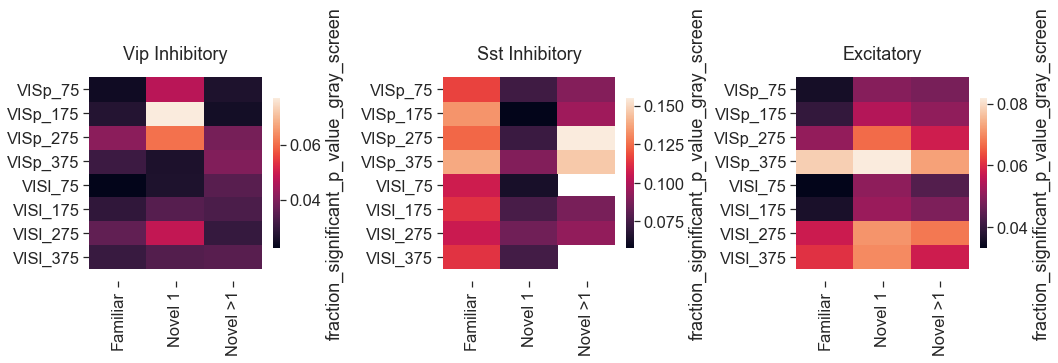

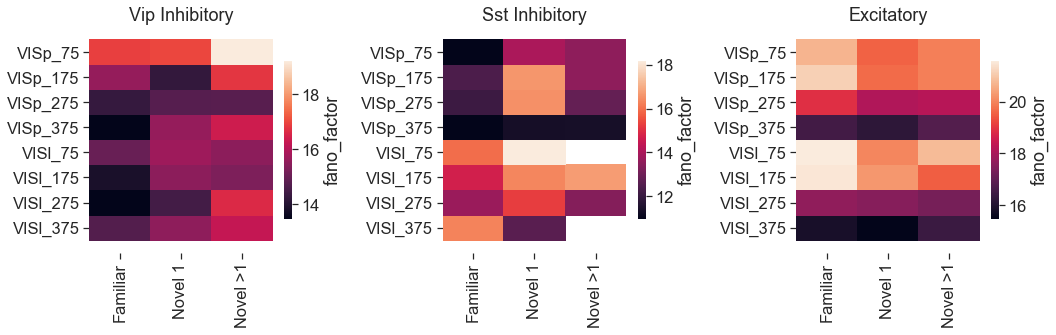

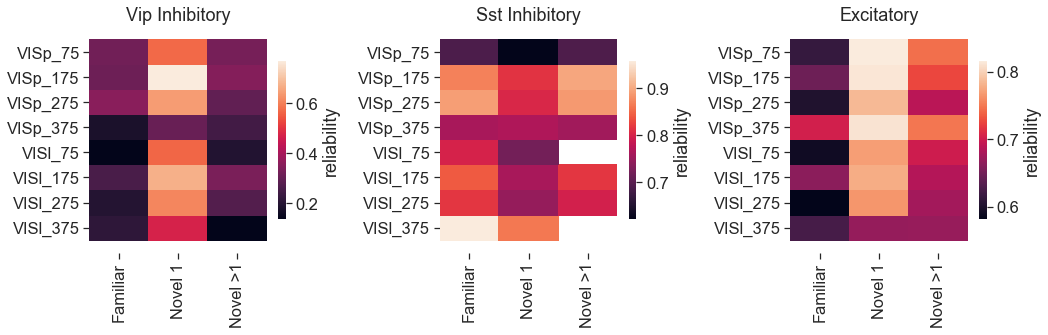

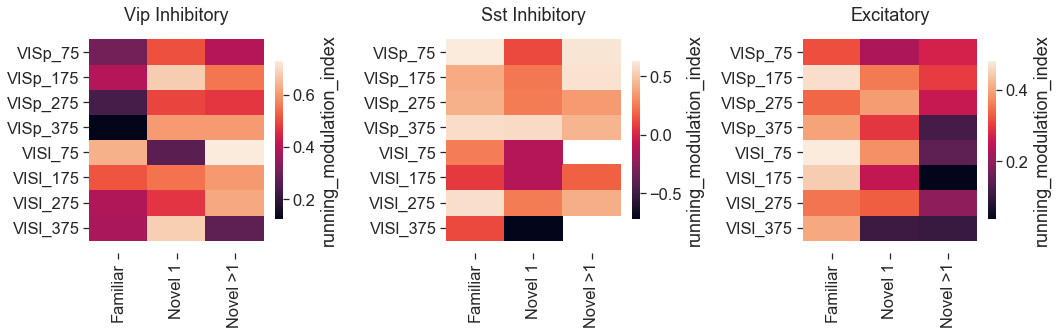

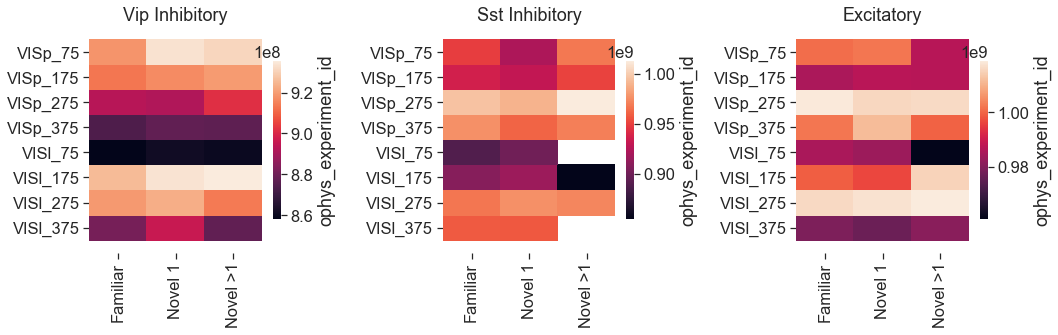

In [33]:
for metric in metrics:
    plot_metric_heatmap_areas_depths(metrics_df, metric)

### look at the numbers

In [34]:
metric = 'lifetime_sparseness'
data = metrics_df.groupby(['cell_type', 'targeted_structure', 'experience_level']).mean()[[metric]].unstack(level=-1)
data

lifetime_sparseness                    
experience_level                             Familiar   Novel 1  Novel >1
cell_type      targeted_structure                                        
Excitatory     VISl                          0.877569  0.879556  0.866175
               VISp                          0.887825  0.892650  0.879619
Sst Inhibitory VISl                          0.815809  0.819322  0.768935
               VISp                          0.766081  0.809953  0.762967
Vip Inhibitory VISl                          0.720022  0.777275  0.759019
               VISp                          0.781788  0.787317  0.805595

In [35]:
metrics_df.groupby(['cell_type', 'area_binned_depth', 'experience_level']).mean()

cell_specimen_id  \
cell_type      area_binned_depth experience_level                     
Excitatory     VISl_175          Familiar              1.095261e+09   
                                 Novel 1               1.094205e+09   
                                 Novel >1              1.095958e+09   
               VISl_275          Familiar              1.099614e+09   
                                 Novel 1               1.100085e+09   
...                                                             ...   
Vip Inhibitory VISp_375          Novel 1               1.086513e+09   
                                 Novel >1              1.086512e+09   
               VISp_75           Familiar              1.086579e+09   
                                 Novel 1               1.086587e+09   
                                 Novel >1              1.086584e+09   

                                                   mean_response  \
cell_type      area_binned_depth experience_level                  
Excitatory     VISl_175          Familiar               0.001038   
                                 Novel 1                0.001200   
                                 Novel >1               0.001525   
               VISl_275          Familiar               0.005901   
                                 Novel 1                0.003370   
...                                                          ...   
Vip Inhibitory VISp_375          Novel 1                0.003432   
                                 Novel >1               0.006908   
               VISp_75           Familiar               0.006405   
                                 Novel 1                0.007356   
                                 Novel >1               0.005076   

                                                   image_selectivity_index  \
cell_type      area_binned_depth experience_level                            
Excitatory     VISl_175          Familiar                         0.998878   
                                 Novel 1                          0.998609   
                                 Novel >1                         0.998571   
               VISl_275          Familiar                         0.993203   
                                 Novel 1                          0.994372   
...                                                                    ...   
Vip Inhibitory VISp_375          Novel 1                          0.999949   
                                 Novel >1                         0.994806   
               VISp_75           Familiar                         0.996793   
                                 Novel 1                          0.996260   
                                 Novel >1                         0.995895   

                                                   image_selectivity_index_one_vs_all  \
cell_type      area_binned_depth experience_level                                       
Excitatory     VISl_175          Familiar                                    0.907683   
                                 Novel 1                                     0.902403   
                                 Novel >1                                    0.883155   
               VISl_275          Familiar                                    0.829364   
                                 Novel 1                                     0.839882   
...                                                                               ...   
Vip Inhibitory VISp_375          Novel 1                                     0.795226   
                                 Novel >1                                    0.741609   
               VISp_75           Familiar                                    0.810999   
                                 Novel 1                                     0.791780   
                                 Novel >1                                    0.851657   

                                                   lifetime_sparsenes

### fraction responsive cells

In [36]:
metrics_df = original_metrics_df.copy()
metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
metrics_df = utilities.limit_to_last_familiar_second_novel_active(metrics_df)
# metrics_df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(metrics_df)

In [37]:
def get_fraction_responsive_cells(df, conditions=['cell_type', 'experience_level'], responsiveness_threshold=0.1):
    total_cells = df.groupby(conditions).count()[['cell_specimen_id']].rename(columns={'cell_specimen_id':'total_cells'})
    responsive = df[df.fraction_significant_p_value_gray_screen>responsiveness_threshold].copy()
    responsive_cells = responsive.groupby(conditions).count()[['cell_specimen_id']].rename(columns={'cell_specimen_id':'responsive_cells'})
    fraction = total_cells.merge(responsive_cells, on=conditions)
    fraction['fraction_responsive'] = fraction.responsive_cells/fraction.total_cells
    return fraction

In [38]:
get_fraction_responsive_cells(original_metrics_df, conditions=['cell_type', 'experience_level'], responsiveness_threshold=0.1)

total_cells  responsive_cells  \
cell_type      experience_level                                  
Excitatory     Familiar                34412              2547   
               Novel 1                  9225              1049   
               Novel >1                23887              2436   
Sst Inhibitory Familiar                 1647               699   
               Novel 1                   414                95   
               Novel >1                 1184               383   
Vip Inhibitory Familiar                 3732                86   
               Novel 1                   792                80   
               Novel >1                 2629                89   

                                 fraction_responsive  
cell_type      experience_level                       
Excitatory     Familiar                     0.074015  
               Novel 1                      0.113713  
               Novel >1                     0.101980  
Sst Inhibitory Familiar                     0.424408  
               Novel 1                      0.229469  
               Novel >1                     0.323480  
Vip Inhibitory Familiar                     0.023044  
               Novel 1                      0.101010  
               Novel >1                     0.033853

In [39]:
get_fraction_responsive_cells(metrics_df, conditions=['cell_type', 'experience_level'], responsiveness_threshold=0.1)

total_cells  responsive_cells  \
cell_type      experience_level                                  
Excitatory     Familiar                 8147               602   
               Novel 1                  9225              1049   
               Novel >1                 7526               744   
Sst Inhibitory Familiar                  392               176   
               Novel 1                   414                95   
               Novel >1                  320               100   
Vip Inhibitory Familiar                  823                23   
               Novel 1                   742                73   
               Novel >1                  765                21   

                                 fraction_responsive  
cell_type      experience_level                       
Excitatory     Familiar                     0.073892  
               Novel 1                      0.113713  
               Novel >1                     0.098857  
Sst Inhibitory Familiar                     0.448980  
               Novel 1                      0.229469  
               Novel >1                     0.312500  
Vip Inhibitory Familiar                     0.027947  
               Novel 1                      0.098383  
               Novel >1                     0.027451

### full dataset

In [40]:
experience_levels = np.sort(original_metrics_df.experience_level.unique())

(0, 0.467261531354354)

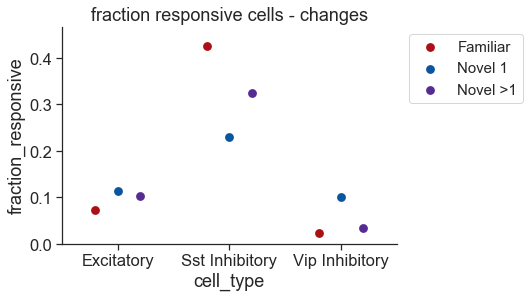

In [41]:
fraction_responsive = get_fraction_responsive_cells(original_metrics_df, conditions=['cell_type', 'experience_level'], responsiveness_threshold=0.1)

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots()
ax = sns.pointplot(data = fraction_responsive.reset_index(), x='cell_type', y='fraction_responsive', hue='experience_level', 
             hue_order=experience_levels, palette=palette, join=False, dodge=0.4, ax=ax)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1.4,1))
ax.set_title('fraction responsive cells - changes')
ax.set_ylim(ymin=0)

### containers with all exp levels

In [42]:
metrics_df = original_metrics_df.copy()
metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
# metrics_df = utilities.limit_to_last_familiar_second_novel_active(metrics_df)
# metrics_df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(metrics_df)

(0, 0.45319082537047806)

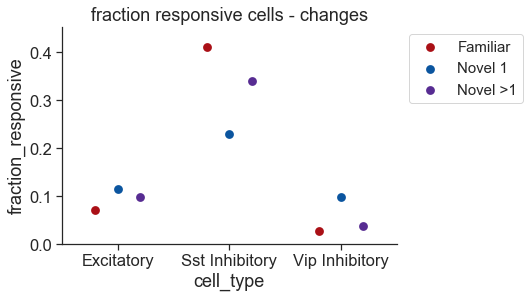

In [43]:
fraction_responsive = get_fraction_responsive_cells(metrics_df, conditions=['cell_type', 'experience_level'], responsiveness_threshold=0.1)

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots()
ax = sns.pointplot(data = fraction_responsive.reset_index(), x='cell_type', y='fraction_responsive', hue='experience_level', 
             hue_order=experience_levels, palette=palette, join=False, dodge=0.4, ax=ax)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1.4,1))
ax.set_title('fraction responsive cells - changes')
ax.set_ylim(ymin=0)

### last familiar first novel

In [44]:
metrics_df = original_metrics_df.copy()
metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
metrics_df = utilities.limit_to_last_familiar_second_novel_active(metrics_df)
# metrics_df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(metrics_df)

(0, 0.49281655784269257)

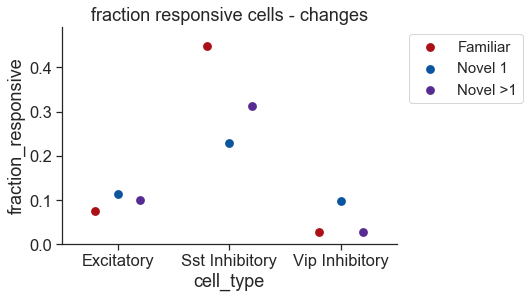

In [45]:
fraction_responsive = get_fraction_responsive_cells(metrics_df, conditions=['cell_type', 'experience_level'], responsiveness_threshold=0.1)

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots()
ax = sns.pointplot(data = fraction_responsive.reset_index(), x='cell_type', y='fraction_responsive', hue='experience_level', 
             hue_order=experience_levels, palette=palette, join=False, dodge=0.4, ax=ax)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1.4,1))
ax.set_title('fraction responsive cells - changes')
ax.set_ylim(ymin=0)

### matched cells

In [46]:
metrics_df = original_metrics_df.copy()
metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
metrics_df = utilities.limit_to_last_familiar_second_novel_active(metrics_df)
# metrics_df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(metrics_df)

(0, 0.4714285714285714)

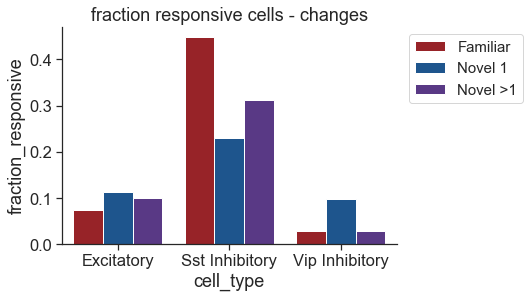

In [47]:
fraction_responsive = get_fraction_responsive_cells(metrics_df, conditions=['cell_type', 'experience_level'], responsiveness_threshold=0.1)

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots()
ax = sns.barplot(data = fraction_responsive.reset_index(), x='cell_type', y='fraction_responsive', hue='experience_level', 
             hue_order=experience_levels, palette=palette, ax=ax)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1.4,1))
ax.set_title('fraction responsive cells - changes')
ax.set_ylim(ymin=0)

### show all containers

(0, 0.5262622532730248)

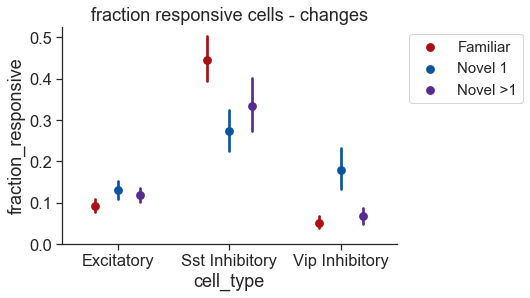

In [48]:
fraction_responsive = get_fraction_responsive_cells(original_metrics_df, conditions=['cell_type', 'experience_level', 'ophys_container_id'], responsiveness_threshold=0.1)

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots()
ax = sns.pointplot(data = fraction_responsive.reset_index(), x='cell_type', y='fraction_responsive', hue='experience_level', 
             hue_order=experience_levels, palette=palette, dodge=0.4, join=False, ax=ax)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1.4,1))
ax.set_title('fraction responsive cells - changes')
ax.set_ylim(ymin=0)

In [49]:
def get_fraction_responsive_cells(df, conditions=['cell_type', 'experience_level'], responsiveness_threshold=0.1):
    total_cells = df.groupby(conditions).count()[['cell_specimen_id']].rename(columns={'cell_specimen_id':'total_cells'})
    responsive = df[df.fraction_significant_p_value_gray_screen>responsiveness_threshold].copy()
    responsive_cells = responsive.groupby(conditions).count()[['cell_specimen_id']].rename(columns={'cell_specimen_id':'responsive_cells'})
    fraction = total_cells.merge(responsive_cells, on=conditions)
    fraction['fraction_responsive'] = fraction.responsive_cells/fraction.total_cells
    return fraction

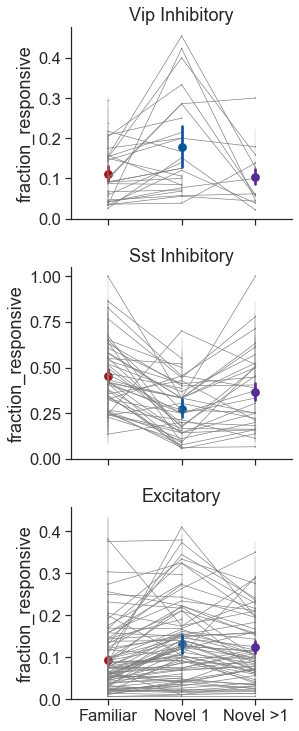

In [50]:
fraction_responsive = get_fraction_responsive_cells(original_metrics_df, conditions=['cell_type', 'experience_level', 'ophys_container_id', 'ophys_experiment_id'], responsiveness_threshold=0.1)
fraction_responsive = fraction_responsive.reset_index()

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(3,1, figsize=(4.5, 10.5), sharex=True)
for i, cell_type in enumerate(cell_types):
    data = fraction_responsive[fraction_responsive.cell_type==cell_type]
    for ophys_container_id in data.ophys_container_id.unique():
        ax[i] = sns.pointplot(data=data[data.ophys_container_id==ophys_container_id], x='experience_level', y='fraction_responsive',  
                 color='gray', join=True, markers='.', scale=0.25, errwidth=0.25, ax=ax[i], zorder=100)

    ax[i] = sns.pointplot(data=data, x='experience_level', y='fraction_responsive', hue='experience_level', 
                 hue_order=experience_levels, palette=palette, dodge=0, join=False, ax=ax[i])
#     ax[i].legend(fontsize='xx-small', title='')
    ax[i].get_legend().remove()
    ax[i].set_title(cell_type)
    ax[i].set_ylim(ymin=0)
    ax[i].set_xlabel('')
fig.tight_layout()

### containers with all exp levels

In [51]:
def get_fraction_responsive_cells(df, conditions=['cell_type', 'experience_level'], responsiveness_threshold=0.1):
    total_cells = df.groupby(conditions).count()[['cell_specimen_id']].rename(columns={'cell_specimen_id':'total_cells'})
    responsive = df[df.fraction_significant_p_value_gray_screen>responsiveness_threshold].copy()
    responsive_cells = responsive.groupby(conditions).count()[['cell_specimen_id']].rename(columns={'cell_specimen_id':'responsive_cells'})
    fraction = total_cells.merge(responsive_cells, on=conditions)
    fraction['fraction_responsive'] = fraction.responsive_cells/fraction.total_cells
    return fraction

In [52]:
metrics_df = original_metrics_df.copy()
metrics_df = utilities.limit_to_last_familiar_second_novel(metrics_df)
metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
# metrics_df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(metrics_df)

In [53]:
fraction_responsive = get_fraction_responsive_cells(metrics_df, conditions=['cell_type', 'ophys_container_id', 'experience_level', 'ophys_experiment_id'], responsiveness_threshold=0.1)


In [54]:
conditions=['cell_type', 'ophys_container_id', 'experience_level', 'ophys_experiment_id']

In [55]:
total_cells = metrics_df.groupby(conditions).count()[['cell_specimen_id']].rename(columns={'cell_specimen_id':'total_cells'})
total_cells

total_cells
cell_type      ophys_container_id experience_level ophys_experiment_id             
Excitatory     803589437          Familiar         807753334                    286
                                  Novel 1          808621034                    302
                                  Novel >1         809501118                    200
               812858755          Familiar         815652334                    156
                                  Novel 1          817267785                    164
...                                                                             ...
Vip Inhibitory 1064333290         Novel 1          1067648397                    18
                                  Novel >1         1068173247                    19
               1064333322         Familiar         1067133175                    18
                                  Novel 1          1067647876                    25
                                  Novel >1         1069286458                    37

[429 rows x 1 columns]

### fraction responsive last familiar first novel

In [56]:
metrics_df = original_metrics_df.copy()
# metrics_df = utilities.limit_to_last_familiar_second_novel(metrics_df)
metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
# metrics_df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(metrics_df)

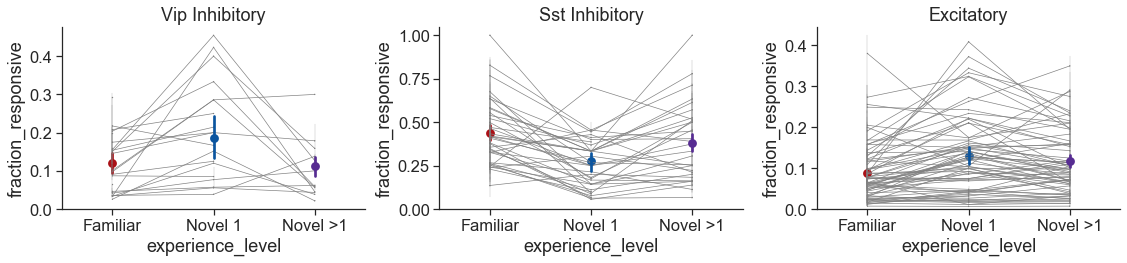

In [57]:
fraction_responsive = get_fraction_responsive_cells(metrics_df, conditions=['cell_type', 'ophys_container_id', 'experience_level', 'ophys_experiment_id'], responsiveness_threshold=0.1)
fraction_responsive = fraction_responsive.reset_index()

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(1,3, figsize=(16,4))
for i, cell_type in enumerate(cell_types):
    data = fraction_responsive[fraction_responsive.cell_type==cell_type]
    for ophys_container_id in data.ophys_container_id.unique():
        ax[i] = sns.pointplot(data=data[data.ophys_container_id==ophys_container_id], x='experience_level', y='fraction_responsive',  
                 color='gray', join=True, markers='.', scale=0.25, errwidth=0.25, ax=ax[i], zorder=100)

    ax[i] = sns.pointplot(data=data, x='experience_level', y='fraction_responsive', hue='experience_level', 
                 hue_order=experience_levels, palette=palette, dodge=0, join=False, ax=ax[i])
#     ax[i].legend(fontsize='xx-small', title='')
    ax[i].get_legend().remove()
    ax[i].set_title(cell_type)
    ax[i].set_ylim(ymin=0)
fig.tight_layout()

### full dataset

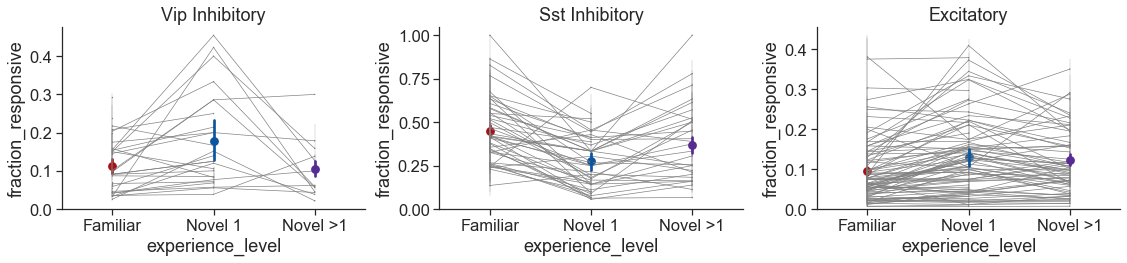

In [58]:
fraction_responsive = get_fraction_responsive_cells(original_metrics_df, conditions=['cell_type', 'experience_level', 'ophys_container_id', 'ophys_experiment_id'], responsiveness_threshold=0.1)
fraction_responsive = fraction_responsive.reset_index()

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots(1,3, figsize=(16,4))
for i, cell_type in enumerate(cell_types):
    data = fraction_responsive[fraction_responsive.cell_type==cell_type]
    for ophys_container_id in data.ophys_container_id.unique():
        ax[i] = sns.pointplot(data=data[data.ophys_container_id==ophys_container_id], x='experience_level', y='fraction_responsive',  
                 color='gray', join=True, markers='.', scale=0.25, errwidth=0.25, ax=ax[i], zorder=100)

    ax[i] = sns.pointplot(data=data, x='experience_level', y='fraction_responsive', hue='experience_level', 
                 hue_order=experience_levels, palette=palette, dodge=0, join=False, ax=ax[i])
#     ax[i].legend(fontsize='xx-small', title='')
    ax[i].get_legend().remove()
    ax[i].set_title(cell_type)
    ax[i].set_ylim(ymin=0)
fig.tight_layout()

### selectivity of all cells

In [59]:
metrics_df = original_metrics_df.copy()

Text(0.5, 0, '')

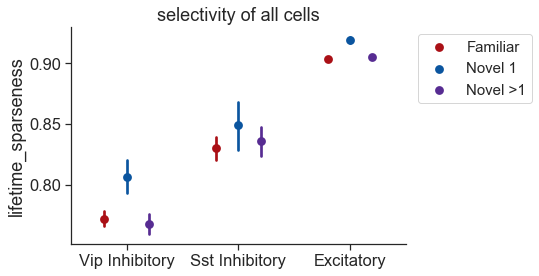

In [60]:
palette = utils.get_experience_level_colors()
fig, ax = plt.subplots()
ax = sns.pointplot(data = metrics_df, x='cell_type', y='lifetime_sparseness', hue='experience_level', 
             hue_order=experience_levels, palette=palette, dodge=0.4, join=False, ax=ax, order=cell_types)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1.4,1))
ax.set_title('selectivity of all cells')
ax.set_xlabel('')
# ax.set_ylim(ymin=0)

### selectivity of responsive cells

In [61]:
metrics_df = original_metrics_df.copy()
# metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
# metrics_df = utilities.limit_to_last_familiar_second_novel_active(metrics_df)
# metrics_df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(metrics_df)

Text(0.5, 0, '')

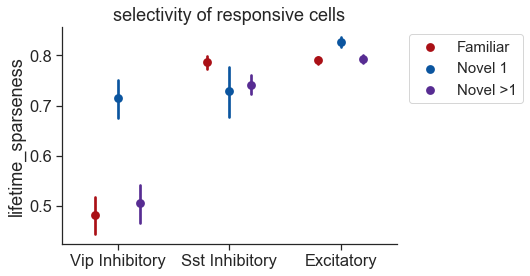

In [62]:
responsive_cells_df = metrics_df[metrics_df.fraction_significant_p_value_gray_screen>0.1].copy()

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots()
ax = sns.pointplot(data = responsive_cells_df, x='cell_type', y='lifetime_sparseness', hue='experience_level', 
             hue_order=experience_levels, palette=palette, dodge=0.4, join=False, order=cell_types, ax=ax)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1.4,1))
ax.set_title('selectivity of responsive cells')
ax.set_xlabel('')

# ax.set_ylim(ymin=0)

### selectivity of matched cells

In [63]:
metrics_df = original_metrics_df.copy()
# metrics_df = utilities.limit_to_containers_with_all_experience_levels(metrics_df)
# metrics_df = utilities.limit_to_last_familiar_second_novel_active(metrics_df)
metrics_df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(metrics_df)

Text(0.5, 0, '')

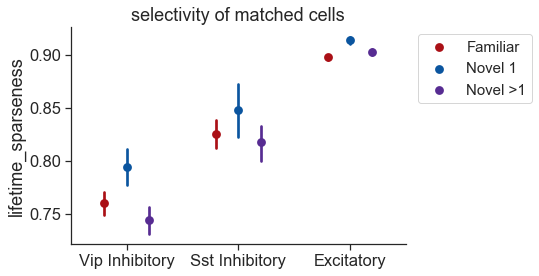

In [64]:
# responsive_cells_df = metrics_df[metrics_df.fraction_significant_p_value_gray_screen>0.1].copy()

palette = utils.get_experience_level_colors()
fig, ax = plt.subplots()
ax = sns.pointplot(data=metrics_df, x='cell_type', y='lifetime_sparseness', hue='experience_level', 
             hue_order=experience_levels, palette=palette, dodge=0.4, join=False, order=cell_types, ax=ax)
ax.legend(fontsize='small', title='', bbox_to_anchor=(1.4,1))
ax.set_title('selectivity of matched cells')
ax.set_xlabel('')

# ax.set_ylim(ymin=0)